## Pomodor Calendar

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_pomodoro_file_path = "/Users/kdalwani/code/workspace/datascience/data/data-pomodoro/PomodoroRecord_june_30.csv"
pomod = pd.read_csv(raw_pomodoro_file_path, encoding='utf-8-sig')

In [3]:
pomod.head()

,Date,Task,Project,Count
0,2015-09-03,NaN,NaN,NaN
1,NaN,Daily Tasks,NaN,1
2,2015-09-04,NaN,NaN,NaN
3,NaN,3 most imp. task for today(last change),iPhone Calendar Event,1
4,NaN,Grand canyon planning,Default Project,1


In [4]:
pomod.index.is_unique


True

In [9]:
type(pomod)

pandas.core.frame.DataFrame

In [5]:
pomod.count()

Date       208
Task       485
Project    476
Count      485
dtype: int64

### Date values have na, so forward fill using fillna() method = ffill

In [6]:
ffill_date = pomod["Date"].fillna(method='ffill')
ffill_date.head()

0    2015-09-03
1    2015-09-03
2    2015-09-04
3    2015-09-04
4    2015-09-04
Name: Date, dtype: object

In [7]:
pomod.columns

Index([u'Date', u'Task', u'Project', u'Count'], dtype='object')

In [8]:
pomod["new_Date"] = ffill_date

In [9]:
pomod.head()

,Date,Task,Project,Count,new_Date
0,2015-09-03,NaN,NaN,NaN,2015-09-03
1,NaN,Daily Tasks,NaN,1,2015-09-03
2,2015-09-04,NaN,NaN,NaN,2015-09-04
3,NaN,3 most imp. task for today(last change),iPhone Calendar Event,1,2015-09-04
4,NaN,Grand canyon planning,Default Project,1,2015-09-04


In [10]:
pomod.columns

Index([u'Date', u'Task', u'Project', u'Count', u'new_Date'], dtype='object')

In [11]:
pomod.count()

Date        208
Task        485
Project     476
Count       485
new_Date    693
dtype: int64

In [12]:
del pomod["Date"]

In [13]:
pomod.head()

,Task,Project,Count,new_Date
0,NaN,NaN,NaN,2015-09-03
1,Daily Tasks,NaN,1,2015-09-03
2,NaN,NaN,NaN,2015-09-04
3,3 most imp. task for today(last change),iPhone Calendar Event,1,2015-09-04
4,Grand canyon planning,Default Project,1,2015-09-04


In [14]:
pomod.count()

Task        485
Project     476
Count       485
new_Date    693
dtype: int64

### Drop project and task rows which have Na value. 
- At this point we only need rows which are not Na

In [15]:
pomod = pomod.dropna()

In [16]:
pomod.isnull().sum()

Task        0
Project     0
Count       0
new_Date    0
dtype: int64

In [17]:
pomod_grpby = pomod.groupby(["Project"])

### Total Projects

In [18]:
len(pomod_grpby["Project"])

26

In [19]:
pomod_grpby["Project"].count()

Project
32 A/B: Viewport expansion     29
A/B projects                   41
Apple Projects                  2
Bad habbits                     8
Deep Learning                   1
Default Project                 7
Exercises                      11
Habbit                        131
Health goal                    29
ML related                     48
Machine learning                9
Name ranking 45                 4
Online work                     8
Other work projects             3
Podcast                        11
Podcast                        31
Reading                         8
Reading books                  16
SATR                            3
Sat 16th                        1
Siri API work                  22
Sun 17th Jan                    1
Tentative 2016 goals            2
Work                            2
Work Apple                     38
iPhone Calendar Event          10
Name: Project, dtype: int64

In [20]:
pomod_grpby_task = pomod.groupby(["Task"])

In [21]:
len(pomod_grpby_task["Task"]), pomod_grpby_task["Task"].count()

(118, Task
 13,C                                                 3
 13,D                                                 4
 2016 goal planning                                   1
 24 hour fitness                                      2
 3 most imp. task for today(last change)              1
 3 most imp. task for tomorrow                        1
 300 miles run                                       15
 500 miles bike                                       1
 ADHD experts podcast                                 1
 ADHD re-wired                                        9
 Analysis                                             9
 And query radar                                      1
 Arms day                                             9
 Awk blog                                             1
 Beyond ToDoist podcast                               3
 Beyond Todo list                                     1
 Biking                                               1
 Biking stationary                   

In [22]:
cross =  pd.crosstab([pomod.Task], pomod.Project, 
                   values=pomod.Count ,aggfunc=np.sum)
cross.head()

Project,32 A/B: Viewport expansion,A/B projects,Apple Projects,Bad habbits,Deep Learning,Default Project,Exercises,Habbit,Health goal,ML related,...,Reading,Reading books,SATR,Sat 16th,Siri API work,Sun 17th Jan,Tentative 2016 goals,Work,Work Apple,iPhone Calendar Event
Task,,,,,,,,,,,,,,,,,,,,,
"13,C",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
"13,D",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
2016 goal planning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
24 hour fitness,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 most imp. task for today(last change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [23]:
cross['ML related'][ cross['ML related'] > 0]

Task
Co-occurence matrix                                  3
Figure out library D3                                3
Foursquare Coding                                    8
Foursquare blogging                                 29
Mining massive data set                             22
NY restaurant Coding                                 1
Panda SciPy worksheet                               17
Pomodoro Coding                                     43
SciPy 2013 part1                                     4
SciPy 2013 part2                                     5
SciPy 2013 part3                                     1
SciPy 2013 part4                                     3
Udacity                                              5
[Assignment 2 ](https://www.udacity.com/cours...     2
Name: ML related, dtype: float64

In [24]:
cross.columns

Index([u'32 A/B: Viewport expansion',               u'A/B projects',
                   u'Apple Projects',                u'Bad habbits',
                    u'Deep Learning',            u'Default Project',
                       u'Exercises ',                     u'Habbit',
                      u'Health goal',                 u'ML related',
                 u'Machine learning',            u'Name ranking 45',
                      u'Online work',        u'Other work projects',
                          u'Podcast',                   u'Podcast ',
                          u'Reading',             u'Reading books ',
                             u'SATR',                   u'Sat 16th',
                    u'Siri API work',               u'Sun 17th Jan',
             u'Tentative 2016 goals',                       u'Work',
                       u'Work Apple',      u'iPhone Calendar Event'],
      dtype='object', name=u'Project')

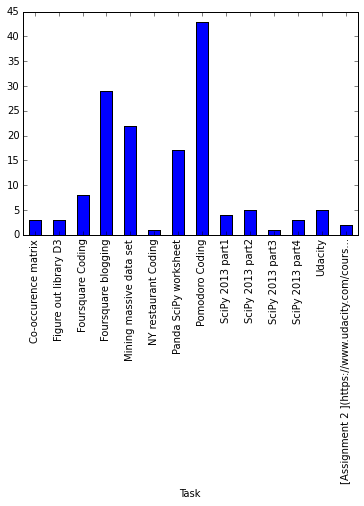

In [25]:
cross['ML related'][ cross['ML related'] > 0].plot(kind='bar')

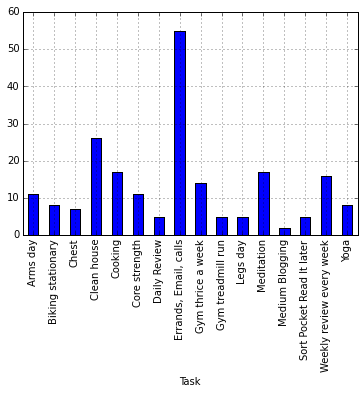

In [26]:
cross['Habbit'][ cross['Habbit'] > 0].plot(kind='bar', grid=True)

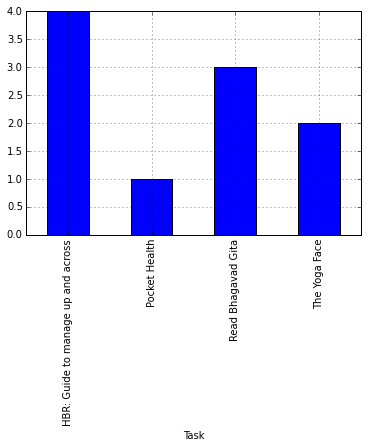

In [27]:
cross['Reading'][ cross['Reading'] > 0].plot(kind='bar', grid=True)

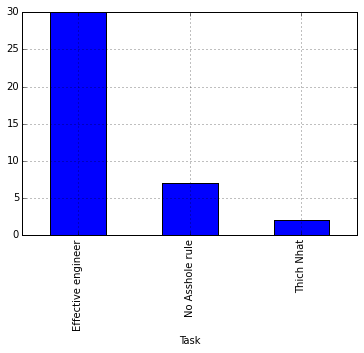

In [28]:
habbit = 'Reading books '

def filter_habbit(habbit):
    return cross[habbit][cross[habbit] > 0]
def plot_habbit(habbit):
     ft = filter_habbit(habbit)
     ft.sort(axis=0, ascending=False)
     ft.plot(kind='bar', grid=True)

plot_habbit(habbit)
habbit = 'Reading books '
habbit_2 = 'Reading'
reading_habbit = filter_habbit(habbit) + filter_habbit(habbit_2)


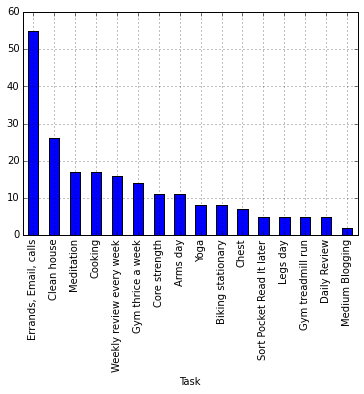

In [29]:
plot_habbit('Habbit')

In [30]:
grp_by_project = pomod.groupby("Project")

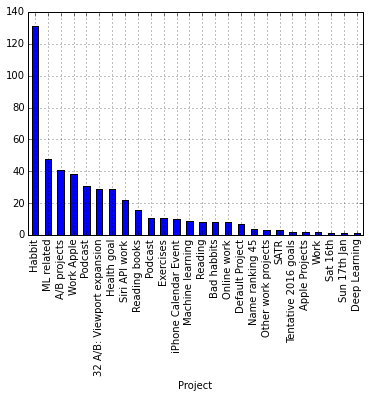

In [31]:
project= grp_by_project["Count"]
p = project.count()
p.sort(axis=0, ascending=False)
p.plot(kind='bar', grid=True)

In [37]:
pomod.head()

,Task,Project,Count,new_Date
3,Grand canyon planning,Default Project,1,2015-09-04
4,3 most imp. task for today(last change),iPhone Calendar Event,1,2015-09-04
6,Thich Nhat,Reading books,2,2015-09-05
7,K means understanding,Machine learning,3,2015-09-05
9,K-means blogging,Machine learning,2,2015-09-06


In [33]:
pomod["Date"] = pomod["new_Date"]
write_pomod = pomod.copy()
del write_pomod["new_Date"]
header = ["Date", "Pomodoro", "Project", "Count"]
write_pomod["Pomodoro"] = write_pomod["Task"]
write_pomod.to_csv(raw_pomodoro_file_path + "_out_.csv", columns=header, index = False)


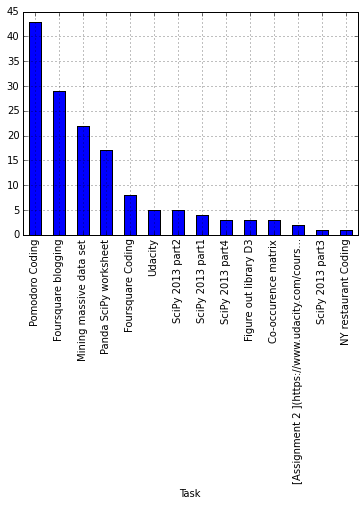

In [34]:
plot_habbit("ML related")

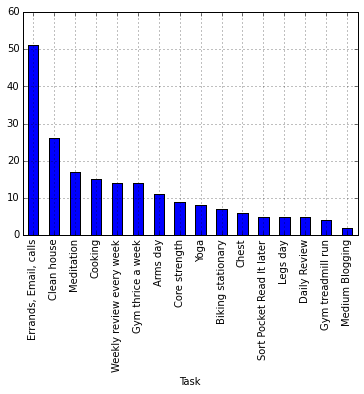

In [41]:
plot_habbit("Habbit")